pyVBRc : [INFO ] 2023-07-26 11:44:28,171:  /home/chris/src/vbr_related/pyVBRc/pyVBRc/sample_data/VBRc_sample_LUT.mat loaded.


4219.030239640764


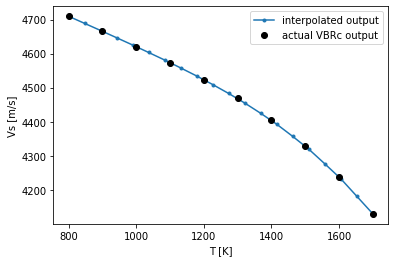

<Figure size 432x288 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pyVBRc.sample_data import get_sample_filename
from pyVBRc.vbrc_structure import VBRCstruct

file = get_sample_filename("VBRc_sample_LUT.mat")
vbr = VBRCstruct(file, lut_dimensions=["T_K", "phi", "dg_um"])

interp = vbr.interpolator(
    ("anelastic", "andrade_psp", "V"), 0, log_vars=["phi", "dg_um"]
)

# evaluate at one arbitrary point
# (T in K, log(phi), log(dg in micrometer))
target = (1333 + 273.0, np.log10(0.0012), np.log10(1131))

Vs_interp = interp(target)
print(Vs_interp)

# resample at a higher resolution
T = vbr.input.SV.T_K[:, 0, 0]
nT = len(T)
T_targets = np.linspace(T.min(), T.max(), nT * 2)
phival = vbr.input.SV.phi.min()
dgval = vbr.input.SV.dg_um.min()
phi_targets = np.full(T_targets.shape, np.log10(phival))
dg_targets = np.full(T_targets.shape, np.log10(dgval))
targets = np.column_stack((T_targets, phi_targets, dg_targets))
Vs_interp = interp(targets)

# compare to actual Vs along curve
actual_Vs = vbr.output.anelastic.andrade_psp.V[:, 0, 0, 0]

plt.plot(T_targets, Vs_interp, label="interpolated output", marker=".")
plt.plot(T, actual_Vs, ".k", label="actual VBRc output", markersize=12)
plt.legend()
plt.xlabel("T [K]")
plt.ylabel("Vs [m/s]")
plt.show()
plt.savefig("interpolate_example.png")
